In [ ]:
#import libraries
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [ ]:
# Download training data from open datasets.
training_data = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

100%|██████████| 170M/170M [00:05<00:00, 30.0MB/s]


In [ ]:
#set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} device")

Using cuda device


In [ ]:
#dataloaders
train = DataLoader(training_data, batch_size=64, shuffle=True)
test = DataLoader(test_data, batch_size=64, shuffle=False)

In [ ]:
#CNN
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.feature_extractor = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.dense_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 8 * 8, 512),
            nn.ReLU(),
        )
        self.output_layer = nn.Linear(512, 10)
    def forward(self, x):
        x = self.feature_extractor(x)
        x = self.dense_layer(x)
        x = self.output_layer(x)
        return x

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.dense_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32 * 32 * 3, 512),
            nn.ReLU(),
        )
        self.output_layer = nn.Linear(512, 10)
    def forward(self, x):
        #x = self.feature_extractor(x)
        x = self.dense_layer(x)
        x = self.output_layer(x)
        return x

In [ ]:
#initialize
epochs = 10
lr = 0.01
plot_loss = []
model = CNN().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

In [ ]:
#training loop
def train_loop(epochs):
    for epoch in range(epochs):
        model.train()
        for batch, (X, y) in enumerate(train):
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss = loss_fn(y_pred, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            if batch % 100 == 0:
                loss, current = loss.item(), batch * len(X)
                print(f"loss: {loss:>7f}  [{current:>5d}/{len(train.dataset):>5d}]")
                plot_loss.append(loss)
    plt.plot(plot_loss)
    plt.title("Loss")
    plt.xlabel("Batch")
    plt.ylabel("Loss")
    plt.ylim(0,2.5)
    plt.show()

In [ ]:
#test loop
def evaluate(epochs):
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in test:
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss = loss_fn(y_pred, y)
            test_loss += loss.item()
            correct += (y_pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= len(test)
    correct /= len(test.dataset)
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

loss: 2.324117  [    0/50000]
loss: 2.141701  [ 6400/50000]
loss: 2.005431  [12800/50000]
loss: 2.084099  [19200/50000]
loss: 2.011485  [25600/50000]
loss: 1.990481  [32000/50000]
loss: 1.828544  [38400/50000]
loss: 1.814331  [44800/50000]
loss: 1.799798  [    0/50000]
loss: 1.957710  [ 6400/50000]
loss: 1.961644  [12800/50000]
loss: 1.893458  [19200/50000]
loss: 1.798698  [25600/50000]
loss: 1.801139  [32000/50000]
loss: 1.665590  [38400/50000]
loss: 1.818604  [44800/50000]
loss: 1.726693  [    0/50000]
loss: 1.830289  [ 6400/50000]
loss: 1.928299  [12800/50000]
loss: 1.841533  [19200/50000]
loss: 1.876862  [25600/50000]
loss: 1.716309  [32000/50000]
loss: 1.850856  [38400/50000]
loss: 1.813240  [44800/50000]
loss: 1.658820  [    0/50000]
loss: 1.664676  [ 6400/50000]
loss: 1.751329  [12800/50000]
loss: 1.831455  [19200/50000]
loss: 1.463808  [25600/50000]
loss: 1.712679  [32000/50000]
loss: 1.727959  [38400/50000]
loss: 1.706835  [44800/50000]
loss: 1.732135  [    0/50000]
loss: 1.64

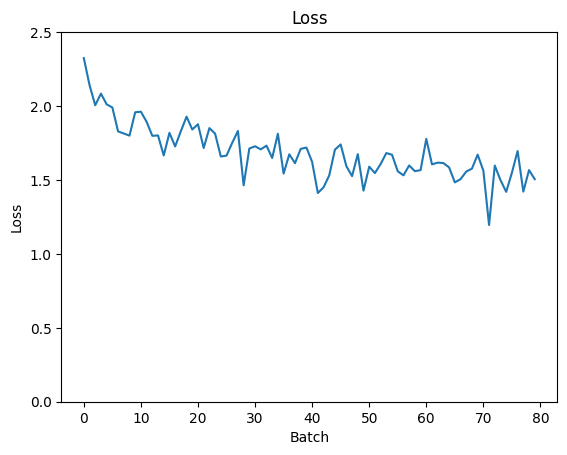

Test Error: 
 Accuracy: 43.3%, Avg loss: 1.594867 



In [ ]:
#run
train_loop(epochs)
evaluate(epochs)